# Binarized analyses of cross-species muscle

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools
import os

# Third-party modules
import matplotlib_venn

import numpy as np
import pandas as pd
import seaborn as sns
import scanpy

# Olga's modules
import xspecies
import binarized
import enrich


outdir_gdrive = "/home/olga/googledrive/TabulaMicrocebus/data/cross-species"
outdir_local = "/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species"
outdirs = outdir_local, outdir_gdrive

# Google drive figure output folder
FIGURE_FOLDER = "/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle"
# !ls -lha $outdir_local

### Local utils to save figures

In [3]:
import sys

# sys.path.append()

sys.path.append(
    "/home/olga/code/xspecies--olgabot/refactor-bladder-blood-lung-muscle/xspecies"
)

from plot_utils import save_figures

Matplotlib Backend: module://ipykernel.pylab.backend_inline


## Constants

In [4]:
groupby = "narrow_group"
species = "species"

tissue = "muscle"

figure_folder_base = os.path.join(FIGURE_FOLDER, tissue, "binarized")

# Load data

In [5]:
%%time

h5ad = os.path.join(
    outdir_local,
    f"concatenated__human-lemur-mouse_10x__one2one_orthologs__{tissue}__preprocessed.h5ad",
#     f"concatenated__human-lemur-mouse_10x__one2one_orthologs__{tissue}__preprocessed.h5ad",
)
adata = scanpy.read_h5ad(h5ad)
adata

CPU times: user 197 ms, sys: 97.5 ms, total: 294 ms
Wall time: 665 ms


AnnData object with n_obs × n_vars = 6794 × 12879
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'batch', 'cell_id_v1', 'cell_id_v2', 'species_batch', 'compartment_broad', 'compartment_narrow', 'compartment_broad_narrow', 'compartment_species', 'compartment_narrow_species', 'log_counts', 'sqrt_counts'
    var: 'mouse_lemur__gene_name-human_hlca', 'mouse__gene_name-human_hlca', 'ensembl_id-human_sapiens', 'len-human_sapiens', 'mouse_lemur__gene_name-lemur', 'mouse__gene_name-lemur', 'name-lemur', 'highly_variable-lemur', 'mouse_lemur__gene_name-mouse_ce', 'mouse__gene_name-mouse_ce', 'n_cells-mouse_tabula_muris_senis', 'mouse_lemur__gene_name-mouse_tabula_muris_senis', 'mouse__gene_name-mouse_tabula_muris_senis', 'n_cells', 'highly_variable', 'means', 'disp

In [6]:
! ls -lha $h5ad

-rw-r--r-- 1 olga czb 82M Jun 27 10:33 /home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/concatenated__human-lemur-mouse_10x__one2one_orthologs__muscle__preprocessed.h5ad


# Within-narrow group, run stability analyses

-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-06-29 10:52:47,576 INFO: Computing fraction cells expressing genes per narrow_group
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-06-29 10:52:47,577 INFO: Filtering adata for only narrow_group shared across all 3 species
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-06-29 10:52:47,581 INFO: Starting number of narrow_group: 4
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-06-29 10:52:47,599 INFO: After removing groups not in all species narrow_group: 4
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-06-29 10:52:47,617 INFO: After cell groups with too few cells in narrow_group: 4
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/not

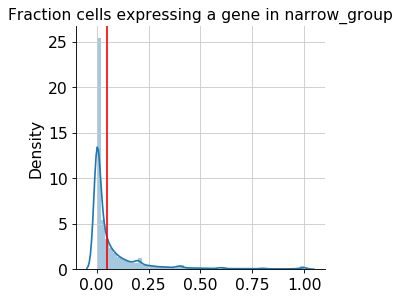

In [7]:
stability = binarized.BinarizedStabilityAnalyses(
    adata, groupby, species, debug=True, species_order=["Human", "Mouse lemur", "Mouse"]
)

Binarizing at thresholds: [0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.06999999999999999, 0.08, 0.09, 0.09999999999999999, 0.11, 0.12, 0.13, 0.14, 0.15000000000000002, 0.16, 0.17, 0.18000000000000002, 0.19, 0.2, 0.21000000000000002, 0.22, 0.23, 0.24000000000000002, 0.25, 0.26, 0.27, 0.28, 0.29000000000000004, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36000000000000004, 0.37, 0.38, 0.39]: 100%|██████████| 39/39 [00:00<00:00, 2204.23it/s]
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-06-29 10:52:49,806 INFO: Computing pairwise mutual information across thresholds
Computing mutual information between thresholds: 0it [00:00, ?it/s][Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
Computing mutual information between thresholds: 48it [00:41,  1.50it/s][Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   41.8s
Computing mutual information between thresholds: 192it [02:39,  1.27it/s][P

(4751292, 4)


-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-06-29 11:03:50,279 INFO: Number of stable genes: 6412/12553 (51.08%)
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-06-29 11:03:50,288 INFO: Number of unstable genes: 6141/12553 (48.92%)


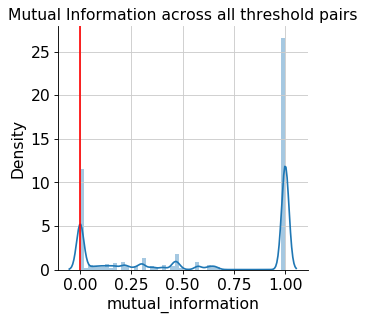

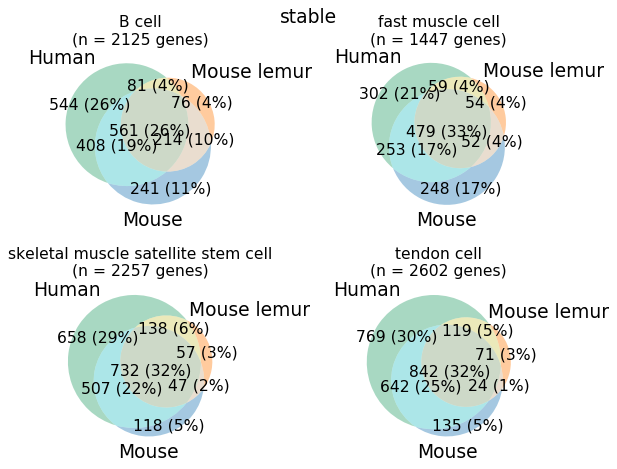

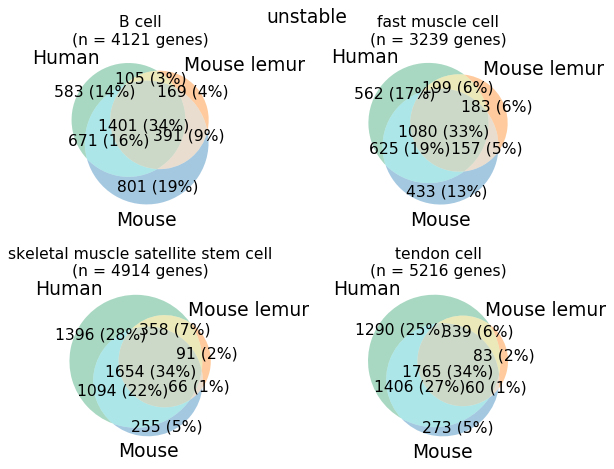

In [8]:
stability.do_stability_analysis(thresholds=np.arange(0.01, 0.4, 0.01))

Saving figures: 100%|██████████| 2/2 [00:10<00:00,  5.40s/it]


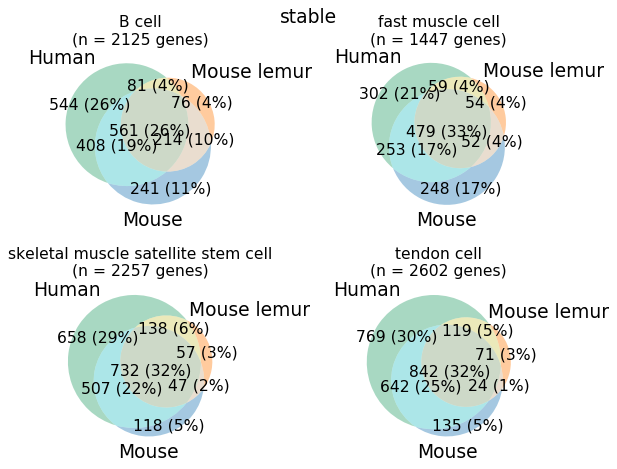

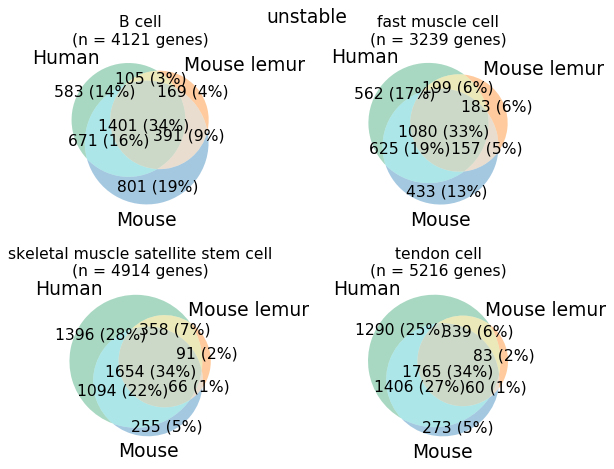

In [9]:
stability.plot_venns()
figure_folder = os.path.join(figure_folder_base, "stable-genes")

save_figures(figure_folder)

### Skip GO enrichment for now --> need to install `gprofiler-official`

In [10]:
# stability.do_go_enrichment(plot=True, write=True)

## Plot enrichment, groupby enrichment database source

In [11]:
# stability.plot_go_enrichment(groupby_source=True)

# Do primate enrichment

In [12]:
species

'species'

-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-06-29 11:04:03,371 INFO: Computing fraction cells expressing genes per narrow_group
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-06-29 11:04:03,372 INFO: Filtering adata for only narrow_group shared across all 3 species
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-06-29 11:04:03,375 INFO: Starting number of narrow_group: 4
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-06-29 11:04:03,525 INFO: After removing groups not in all species narrow_group: 4
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/binarized.py --
2021-06-29 11:04:03,541 INFO: After cell groups with too few cells in narrow_group: 4
-- /home/olga/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/not

CPU times: user 17.7 s, sys: 14.3 s, total: 31.9 s
Wall time: 1min 48s


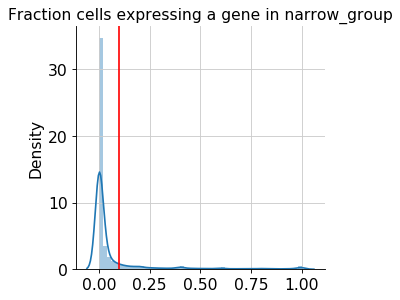

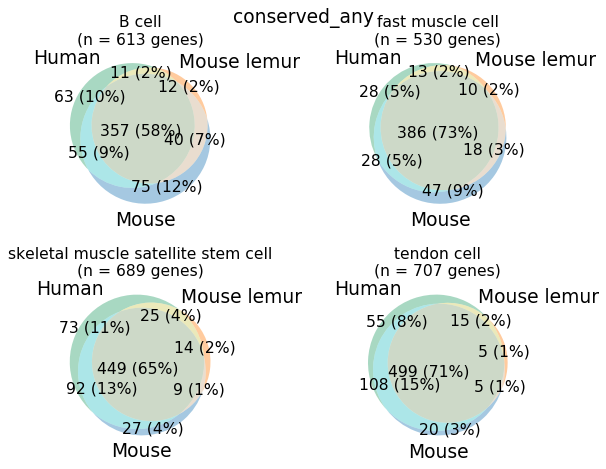

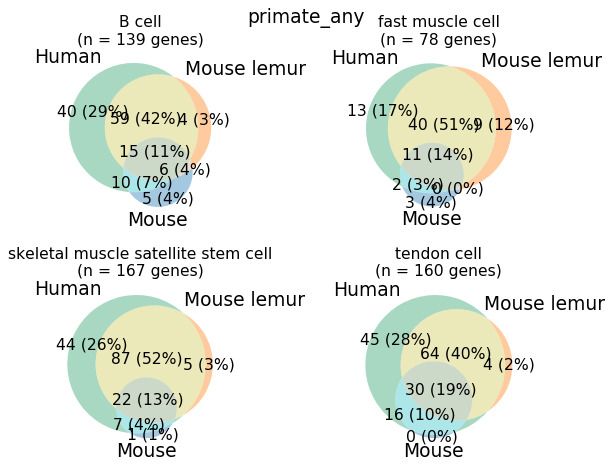

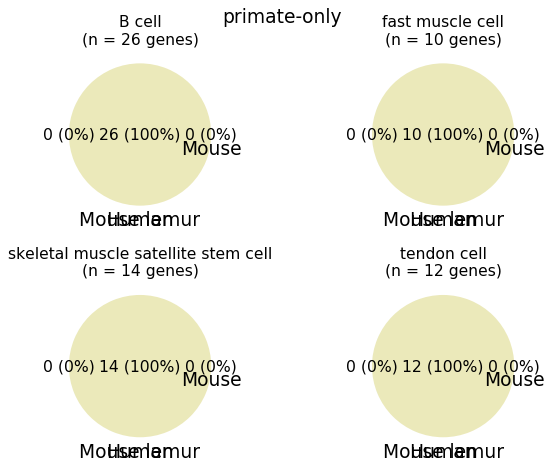

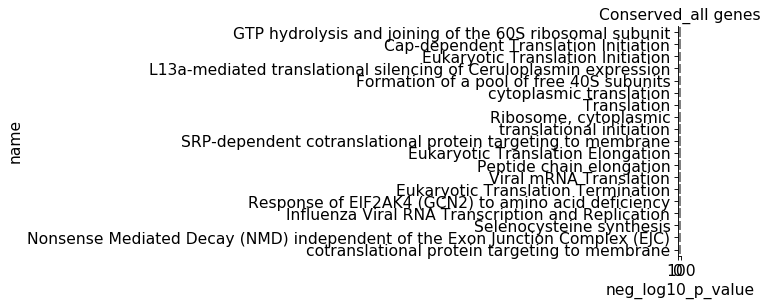

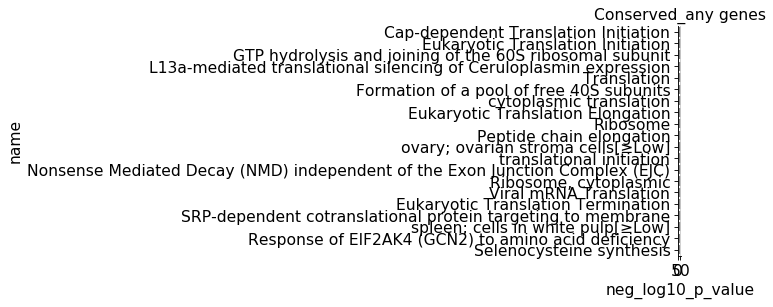

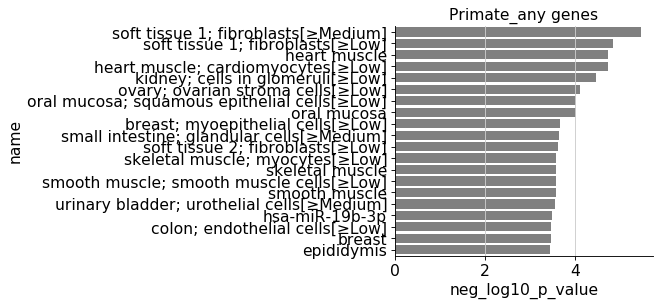

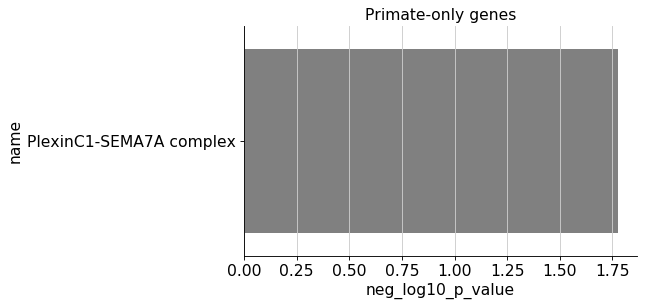

In [13]:
%%time

import binarized

primate = binarized.BinarizedPrimateAnalyses(
    adata,
    groupby,
    species,
    stable_genes=stability.stable_gene_names,
    debug=True,
    primates=["Human", "Mouse lemur"],
    species_order=["Human", "Mouse lemur", "Mouse"],
)
primate.find_primate_enriched_genes()

figure_folder = os.path.join(FIGURE_FOLDER, tissue, "primate")

save_figures(figure_folder)

## Get p value of overlap of binary groups

In [14]:
lines = []

for celltype, df in primate.binarized.groupby(level=1):
    #     print(df.head())
    for species1, species2 in itertools.combinations(primate.species_order, 2):
        pvalue = - binarized.overlap_pvalue_sf(
            df.loc[(species1, celltype)], df.loc[(species2, celltype)], log=True
        )

        species_pair = primate.separator.join([species1, species2])
        line = [celltype, species1, species2, species_pair, pvalue]
        lines.append(line)

pvalue_df = pd.DataFrame(
    lines, columns=["celltype", "species1", "species2", "species_pair", "log_pvalue"]
)
pvalue_df["log_pvalue_adjusted"] = pvalue_df["log_pvalue"] + np.log(len(pvalue_df))

pvalue_df

,celltype,species1,species2,species_pair,log_pvalue,log_pvalue_adjusted
0,B cell,Human,Mouse lemur,Human--Mouse lemur,359.647198,362.132105
1,B cell,Human,Mouse,Human--Mouse,576.967022,579.451929
2,B cell,Mouse lemur,Mouse,Mouse lemur--Mouse,704.742436,707.227342
3,fast muscle cell,Human,Mouse lemur,Human--Mouse lemur,841.079264,843.564171
4,fast muscle cell,Human,Mouse,Human--Mouse,980.726009,983.210916
5,fast muscle cell,Mouse lemur,Mouse,Mouse lemur--Mouse,868.660242,871.145149
6,skeletal muscle satellite stem cell,Human,Mouse lemur,Human--Mouse lemur,621.756275,624.241182
7,skeletal muscle satellite stem cell,Human,Mouse,Human--Mouse,1046.934639,1049.419546
8,skeletal muscle satellite stem cell,Mouse lemur,Mouse,Mouse lemur--Mouse,712.571613,715.056520
9,tendon cell,Human,Mouse lemur,Human--Mouse lemur,645.502596,647.987502


## Find cell types where the human-lemur overlap is larger than human-mouse

In [15]:
pvalue_df_species_pair_index = pvalue_df.set_index("species_pair")
pvalue_df_species_pair_index.head()

,celltype,species1,species2,log_pvalue,log_pvalue_adjusted
species_pair,,,,,
Human--Mouse lemur,B cell,Human,Mouse lemur,359.647198,362.132105
Human--Mouse,B cell,Human,Mouse,576.967022,579.451929
Mouse lemur--Mouse,B cell,Mouse lemur,Mouse,704.742436,707.227342
Human--Mouse lemur,fast muscle cell,Human,Mouse lemur,841.079264,843.564171
Human--Mouse,fast muscle cell,Human,Mouse,980.726009,983.210916


In [16]:
is_primate_enriched_celltypes = pvalue_df_species_pair_index.groupby("celltype").apply(
    lambda x: x.loc["Human--Mouse lemur", "log_pvalue_adjusted"]
    < x.loc["Human--Mouse", "log_pvalue_adjusted"]
)
is_primate_enriched_celltypes

celltype
B cell                                 True
fast muscle cell                       True
skeletal muscle satellite stem cell    True
tendon cell                            True
dtype: bool

In [17]:
primate_enriched_celltypes = is_primate_enriched_celltypes[
    is_primate_enriched_celltypes
].index

In [18]:
skeletal_muscle = primate.primate_any[primate_enriched_celltypes]
skeletal_muscle[skeletal_muscle == primate.primates_string]

narrow_group,B cell,fast muscle cell,skeletal muscle satellite stem cell,tendon cell
ABCA6,NaN,NaN,NaN,Human--Mouse lemur
ABLIM2,NaN,Human--Mouse lemur,NaN,NaN
ACAP2,Human--Mouse lemur,NaN,NaN,NaN
AHCYL1,Human--Mouse lemur,NaN,NaN,NaN
ALDH9A1,NaN,Human--Mouse lemur,NaN,NaN
...,...,...,...,...
ZNF593,NaN,Human--Mouse lemur,NaN,NaN
ZNF609,NaN,NaN,Human--Mouse lemur,NaN
ZNF704,NaN,NaN,Human--Mouse lemur,Human--Mouse lemur
ZNF791,Human--Mouse lemur,NaN,Human--Mouse lemur,Human--Mouse lemur


## Find cell types where the human-lemur overlap is larger than human-mouse

In [19]:
pvalue_df_species_pair_index = pvalue_df.set_index("species_pair")
pvalue_df_species_pair_index.head()

,celltype,species1,species2,log_pvalue,log_pvalue_adjusted
species_pair,,,,,
Human--Mouse lemur,B cell,Human,Mouse lemur,359.647198,362.132105
Human--Mouse,B cell,Human,Mouse,576.967022,579.451929
Mouse lemur--Mouse,B cell,Mouse lemur,Mouse,704.742436,707.227342
Human--Mouse lemur,fast muscle cell,Human,Mouse lemur,841.079264,843.564171
Human--Mouse,fast muscle cell,Human,Mouse,980.726009,983.210916


In [20]:
pvalue_df_species_pair_index

,celltype,species1,species2,log_pvalue,log_pvalue_adjusted
species_pair,,,,,
Human--Mouse lemur,B cell,Human,Mouse lemur,359.647198,362.132105
Human--Mouse,B cell,Human,Mouse,576.967022,579.451929
Mouse lemur--Mouse,B cell,Mouse lemur,Mouse,704.742436,707.227342
Human--Mouse lemur,fast muscle cell,Human,Mouse lemur,841.079264,843.564171
Human--Mouse,fast muscle cell,Human,Mouse,980.726009,983.210916
Mouse lemur--Mouse,fast muscle cell,Mouse lemur,Mouse,868.660242,871.145149
Human--Mouse lemur,skeletal muscle satellite stem cell,Human,Mouse lemur,621.756275,624.241182
Human--Mouse,skeletal muscle satellite stem cell,Human,Mouse,1046.934639,1049.419546
Mouse lemur--Mouse,skeletal muscle satellite stem cell,Mouse lemur,Mouse,712.571613,715.056520


## Plot difference in p-value of overlap between binarized genes in cell types

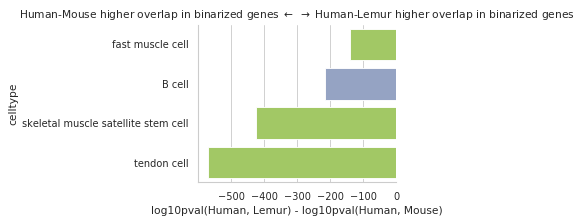

In [21]:
pvalue_diff = pvalue_df_species_pair_index.groupby("celltype").apply(
    lambda x: x.loc["Human--Mouse lemur", "log_pvalue_adjusted"]
    - x.loc["Human--Mouse", "log_pvalue_adjusted"]
)
pvalue_diff = pvalue_diff.reset_index()
pvalue_diff = pvalue_diff.rename(columns={0: "diff_log_pvalue"})
pvalue_diff = pvalue_diff.sort_values("diff_log_pvalue", ascending=False)
pvalue_diff.head()

narrow_to_compartment = adata.obs[["narrow_group", "compartment_group"]].set_index(
    "narrow_group"
)
narrow_to_compartment = narrow_to_compartment.loc[
    ~narrow_to_compartment.index.duplicated(), "compartment_group"
]
narrow_to_compartment

pvalue_diff["compartment"] = pvalue_diff.celltype.map(narrow_to_compartment)
pvalue_diff.head()

colors = {
    x: xspecies.compartment_to_color[y]
    for i, (x, y) in pvalue_diff[["celltype", "compartment"]].iterrows()
}


sns.set(context="paper", style="whitegrid")

g = sns.catplot(
    data=pvalue_diff, y="celltype", x="diff_log_pvalue", kind="bar", palette=colors,
    height=2.5, aspect=2,
)
g.set(xlabel="log10pval(Human, Lemur) - log10pval(Human, Mouse)")
pdf = os.path.join(
    figure_folder_base,
    f"binarized__{tissue}__pvalue_diff_overlap__human-lemur_vs_human-mouse.pdf",
)
g.set(
    title=(
        r"Human-Mouse higher overlap in binarized genes $\leftarrow$"
        r" $\rightarrow$ Human-Lemur higher overlap in binarized genes"
    )
)
g.savefig(pdf)

In [22]:
is_primate_enriched_celltypes = pvalue_df_species_pair_index.groupby("celltype").apply(
    lambda x: x.loc["Human--Mouse lemur", "log_pvalue_adjusted"]
    < x.loc["Human--Mouse", "log_pvalue_adjusted"]
)
is_primate_enriched_celltypes

celltype
B cell                                 True
fast muscle cell                       True
skeletal muscle satellite stem cell    True
tendon cell                            True
dtype: bool

In [23]:
primate_enriched_celltypes = is_primate_enriched_celltypes[
    is_primate_enriched_celltypes
].index
print('\n'.join(is_primate_enriched_celltypes[primate_enriched_celltypes].index))

B cell
fast muscle cell
skeletal muscle satellite stem cell
tendon cell


## Make table of primate enriched genes

In [24]:
primate_enriched_celltypes

Index(['B cell', 'fast muscle cell', 'skeletal muscle satellite stem cell',
       'tendon cell'],
      dtype='object', name='celltype')

In [25]:
genes_in_primate_enriched_celltypes = primate.primate_any[primate_enriched_celltypes]
genes_in_primate_enriched_celltypes = genes_in_primate_enriched_celltypes[
    genes_in_primate_enriched_celltypes == primate.primates_string
]
genes_in_primate_enriched_celltypes = genes_in_primate_enriched_celltypes.dropna(
    how="all"
)

df_components = {}

for celltype, col in genes_in_primate_enriched_celltypes.iteritems():
    print(f"--- {celltype} ---")
    celltype_primate_genes = col[col == primate.primates_string].dropna(how="all")
    df_components[celltype] = sorted(celltype_primate_genes.index.tolist())

max_n_genes = max(len(v) for v in df_components.values())
df_components = {
    k: v + [None] * (max_n_genes - len(v)) for k, v in df_components.items()
}
primate_enriched_genes_per_celltype = pd.DataFrame(df_components)
primate_enriched_genes_per_celltype

--- B cell ---
--- fast muscle cell ---
--- skeletal muscle satellite stem cell ---
--- tendon cell ---


,B cell,fast muscle cell,skeletal muscle satellite stem cell,tendon cell
0,ACAP2,ABLIM2,ANO6,ABCA6
1,AHCYL1,ALDH9A1,ARL5A,ANKRD13A
2,ARID3A,ANKRD1,ASS1,BAZ2A
3,ARL4C,BCAP29,ATF2,BCL6
4,C4orf48,CORO6,BAZ2A,C1GALT1
...,...,...,...,...
82,None,None,VPS13C,None
83,None,None,ZNF146,None
84,None,None,ZNF609,None
85,None,None,ZNF704,None


In [26]:
genes_in_primate_enriched_celltypes

narrow_group,B cell,fast muscle cell,skeletal muscle satellite stem cell,tendon cell
ABCA6,NaN,NaN,NaN,Human--Mouse lemur
ABLIM2,NaN,Human--Mouse lemur,NaN,NaN
ACAP2,Human--Mouse lemur,NaN,NaN,NaN
AHCYL1,Human--Mouse lemur,NaN,NaN,NaN
ALDH9A1,NaN,Human--Mouse lemur,NaN,NaN
...,...,...,...,...
ZNF593,NaN,Human--Mouse lemur,NaN,NaN
ZNF609,NaN,NaN,Human--Mouse lemur,NaN
ZNF704,NaN,NaN,Human--Mouse lemur,Human--Mouse lemur
ZNF791,Human--Mouse lemur,NaN,Human--Mouse lemur,Human--Mouse lemur


In [27]:
genes_in_primate_enriched_celltypes

narrow_group,B cell,fast muscle cell,skeletal muscle satellite stem cell,tendon cell
ABCA6,NaN,NaN,NaN,Human--Mouse lemur
ABLIM2,NaN,Human--Mouse lemur,NaN,NaN
ACAP2,Human--Mouse lemur,NaN,NaN,NaN
AHCYL1,Human--Mouse lemur,NaN,NaN,NaN
ALDH9A1,NaN,Human--Mouse lemur,NaN,NaN
...,...,...,...,...
ZNF593,NaN,Human--Mouse lemur,NaN,NaN
ZNF609,NaN,NaN,Human--Mouse lemur,NaN
ZNF704,NaN,NaN,Human--Mouse lemur,Human--Mouse lemur
ZNF791,Human--Mouse lemur,NaN,Human--Mouse lemur,Human--Mouse lemur


#### Write primate-specific gene enrichement to file

In [28]:
xlsx = os.path.join(
    figure_folder_base, "genes_in_primate_enriched_celltypes.xlsx"
)
primate_enriched_genes_per_celltype.to_excel(xlsx)

In [29]:
genes_in_primate_enriched_celltypes

narrow_group,B cell,fast muscle cell,skeletal muscle satellite stem cell,tendon cell
ABCA6,NaN,NaN,NaN,Human--Mouse lemur
ABLIM2,NaN,Human--Mouse lemur,NaN,NaN
ACAP2,Human--Mouse lemur,NaN,NaN,NaN
AHCYL1,Human--Mouse lemur,NaN,NaN,NaN
ALDH9A1,NaN,Human--Mouse lemur,NaN,NaN
...,...,...,...,...
ZNF593,NaN,Human--Mouse lemur,NaN,NaN
ZNF609,NaN,NaN,Human--Mouse lemur,NaN
ZNF704,NaN,NaN,Human--Mouse lemur,Human--Mouse lemur
ZNF791,Human--Mouse lemur,NaN,Human--Mouse lemur,Human--Mouse lemur


In [30]:
genes_in_primate_enriched_celltypes_binary = genes_in_primate_enriched_celltypes.fillna(
    False
).replace(primate.primates_string, True)
genes_in_primate_enriched_celltypes_binary

narrow_group,B cell,fast muscle cell,skeletal muscle satellite stem cell,tendon cell
ABCA6,False,False,False,True
ABLIM2,False,True,False,False
ACAP2,True,False,False,False
AHCYL1,True,False,False,False
ALDH9A1,False,True,False,False
...,...,...,...,...
ZNF593,False,True,False,False
ZNF609,False,False,True,False
ZNF704,False,False,True,True
ZNF791,True,False,True,True


## Make dotplots of binary-enriched genes

In [31]:
cross_species = xspecies.CrossSpeciesComparison(adata, 'compartment_narrow')
# cross_species.plot_shared_cell_types()

compartment_narrow                            species    
lymphoid: B cell                              Mouse             0
                                              Mouse lemur       0
                                              Human             0
stromal: fast muscle cell                     Mouse           144
                                              Mouse lemur      41
                                              Human           220
stromal: skeletal muscle satellite stem cell  Mouse          1161
                                              Mouse lemur      86
                                              Human          2121
stromal: tendon cell                          Mouse          1899
                                              Mouse lemur      50
                                              Human            76
dtype: int64


## Plot Muscle Disease gene lists

In [32]:
dystrophin_dystroglycan_complex = """LAMA2
SGCA
SGCB
SGCD
SGCE
DAG1
ACTA2
DMD
NOS1
SNTA1
SNTB2
DTNA
DTNB
DTNBP1"""

polyamine_biosynthesis = """OAZ1
SAT1
OAZ2
AZIN1
SRM
PAO
SMOX
SMS
AMD1
ODC
AMD1
AGMAT
AZIN
OAT
ADC
ARG"""

redox_flux = """GPX3
PRDX1
PDIA3
PDIA6
GLRX3
CYBA
TXNDC5
TXNDC9
TXNRD1
TXNL4A
GPX1
PRDX5
SOD1"""

u1_snrp = """RNU1
SNRNP70
SNRPA
SNRPC
SNRPB1
SNRPD1
SNRPD2
SNRPD3
SNRPE
SNRPF
SNRPG"""

u2_snrp = """RNU2
SNRPA1
SNRPB2
SF3A1
SF3A2
SF3A3
SF3B1
SF3B2
SF3B3
SNRPB1
SNRPD1
SNRPD2
SNRPD3
SNRPE
SNRPF
SNRPG"""

notch = """NOTCH1
NOTCH2
NOTCH3
RBPJ
HES1
HES5
HEY1
HEY2
HEYL
DLL1
DLL2
DLL3
DLL4
JAG1
JAG2"""


ehlers_danlos = """ADAMTS2
B3GALT6
B4GALT7
C1R
C1S
CHST14
COL1A1
COL1A2
COL3A1
COL5A1
DSE
FKBP14
PLOD1
TNXB
FBN1"""

gene_strings = dict(
    dystrophin_dystroglycan_complex=dystrophin_dystroglycan_complex,
    polyamine_biosynthesis=polyamine_biosynthesis,
    redox_flux=redox_flux,
    u1_snrp=u1_snrp,
    u2_snrp=u2_snrp,
    notch=notch,
    ehlers_danlos=ehlers_danlos,
)
gene_lists = {k: v.split() for k, v in gene_strings.items()}
# gene_lists

In [33]:
cross_species.make_subset_adatas(do_pca_umap=False)


------- group: stromal: fast muscle cell -------
number of cells: 405

------- group: stromal: skeletal muscle satellite stem cell -------
number of cells: 3368

------- group: stromal: tendon cell -------
number of cells: 2025

------- group: Mouse -------
number of cells: 3204

------- group: Mouse lemur -------
number of cells: 177

------- group: Human -------
number of cells: 2417


dystrophin_dystroglycan_complex
gene subset #1

------- group: stromal: fast muscle cell -------


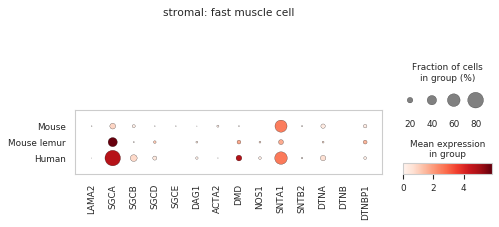


------- group: stromal: skeletal muscle satellite stem cell -------


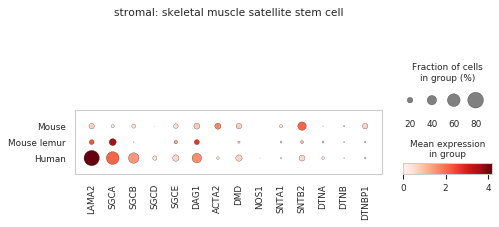


------- group: stromal: tendon cell -------


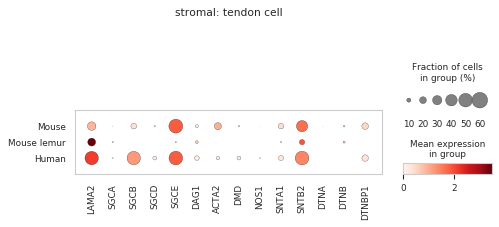

polyamine_biosynthesis
gene subset #1

------- group: stromal: fast muscle cell -------


KeyError: "Values ['PAO', 'SMS', 'ODC', 'AZIN', 'ADC', 'ARG'], from ['OAZ1', 'SAT1', 'OAZ2', 'AZIN1', 'SRM', 'PAO', 'SMOX', 'SMS', 'AMD1', 'ODC', 'AMD1', 'AGMAT', 'AZIN', 'OAT', 'ADC', 'ARG'], are not valid obs/ var names or indices."

In [34]:

for gene_group_name, gene_names in gene_lists.items():
    print(gene_group_name)
    cross_species.dotplots(gene_names)

## Plot binarized groups

In [ ]:
for col_name, col_values in genes_in_primate_enriched_celltypes_binary.iteritems():
    gene_names = col_values[col_values].index
    col_name_sanitized = xspecies.sanitize(col_name)
    cross_species.dotplots(
        gene_names,
        save=f"__binary__{col_name_sanitized}",
        select_group=col_name,
        save_format="pdf",
        max_genes=32,
    )

### Venn diagrams of conserved vs primate

In [ ]:
set_list = [set(primate.primate_any.index), set(primate.conserved_any.index)]
labels = ["primate_any", "conserved_any"]

matplotlib_venn.venn2(set_list, set_labels=labels)

In [ ]:
has_mouse = primate.species_sharing_2d.applymap(
    lambda x: "mouse" in x if isinstance(x, str) else x
)
rows = has_mouse.any(axis=1)
mouse_any = primate.species_sharing_2d.loc[rows]
print(mouse_any.shape)
mouse_any.head()

In [ ]:
set_list = [
    set(primate.primate_any.index),
    set(primate.conserved_any.index),
    set(mouse_any.index),
]
labels = ["primate_any", "conserved_any", "mouse_any"]

matplotlib_venn.venn3(set_list, set_labels=labels)

In [ ]:
len(primate.primate_any.index.intersection(primate.primate_all.index))

In [ ]:
len(primate.primate_any.index.intersection(primate.conserved_any.index))

In [ ]:
# compartment_primate.dotplot("HHIP")

In [ ]:
rows = (
    (primate.species_sharing_2d == "human-lemur") | primate.species_sharing_2d.isnull()
).all(axis=1)
df = primate.species_sharing_2d.loc[rows]
df = df.dropna(how="all")
df

### Plot all-conserved or all-primate, groupby source

In [ ]:
## this is empty, skip
# primate.do_go_enrichment(groupby_source=True, write=True)

### Do per-compartment enrichment, overall

In [ ]:
# primate.do_per_group_enrichment()

### Do per-compartment enrichment, per-source

In [ ]:
primate.do_per_group_enrichment(groupby_source=True, write=True)

figure_folder = os.path.join(figure_folder_base, "primate-gprofiler-enrichment")

save_figures(figure_folder)

# End of notebook